# Import packages
run the following cell to import necessary packages to run the analysis

In [1]:
import os
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt
# from pylibCZIrw import czi as pyczi
# from bioio import BioImage
# import bioio_czi

# Reading data

In [12]:
data_path = Path('/media/npmartins/Data/nuno_martins/Image_data/Ex007_Re01/ExM/20241218/NPM_Ex005_Re05_5_A5_Im-01/')
filelist = os.listdir(data_path)
print(len(filelist))

6


In [13]:
filelist = [x for x in filelist if x.find('.czi')>0]
filelist.sort()

In [14]:
filelist

['NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock1.czi',
 'NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock2.czi',
 'NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock3.czi',
 'NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock4.czi',
 'NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock5.czi']

In [15]:
file_index = 0
file_path = str(data_path)+'/'+filelist[file_index]
filename = filelist[file_index][:filelist[file_index].index('.czi')]
print(file_path)
print(filename)

/media/npmartins/Data/nuno_martins/Image_data/Ex007_Re01/ExM/20241218/NPM_Ex005_Re05_5_A5_Im-01/NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock1.czi
NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock1


In [ ]:
save_path = Path(str(data_path)+'/split_czi')
save_path.mkdir(parents=True, exist_ok=True)
print(save_path)

In [16]:
def getDimensionPosition(dimension_order, dimension_name):
    return dimension_order.index(dimension_name)

___
with Zeiss library `pylibczirw`


In [5]:
from pylibCZIrw import czi as pyczi

In [6]:
with pyczi.open_czi(file_path) as czidoc:
    md_xml = czidoc.raw_metadata

# with open('./xml_metadata_airyscan.xml', 'w') as output:
#     output.write(md_xml)

In [18]:
with pyczi.open_czi(file_path) as czidoc:
    md_dic = czidoc.metadata
    # print(md_xml[:1000])
    dims_all = czidoc.scenes_bounding_rectangle_no_pyramid
    print(dims_all)
    bd = czidoc.scenes_bounding_rectangle
    print(bd)
    tbd = czidoc.total_bounding_box
    print(tbd)
    pixel_types = czidoc.pixel_types
    print(pixel_types)

{0: Rectangle(x=608216, y=358838, w=2048, h=2048)}
{0: Rectangle(x=608216, y=358838, w=2048, h=2048)}
{'T': (0, 1), 'Z': (0, 154), 'C': (0, 3), 'H': (0, 1), 'X': (608216, 610264), 'Y': (358838, 360886)}
{0: 'Gray16', 1: 'Gray16', 2: 'Gray16'}


In [19]:
file_metadata = md_dic

image_name = file_metadata['ImageDocument']['Metadata']['Experiment']['AutoSave']['Name']
original_display_metadata = file_metadata['ImageDocument']['Metadata']['DisplaySetting']['Channels']['Channel'][:2]

pixelsize_x = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value'])
pixelsize_y = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value'])
pixelsize_z = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][2]['Value'])

print(pixelsize_x, pixelsize_y, pixelsize_z)

1.0358032226562499e-07 1.0358032226562499e-07 4e-07


get z voxel size of all files in folder

In [19]:
images_to_inspect = []

for file in filelist:
    print(file)
    file_path = str(data_path)+'/'+file
    with pyczi.open_czi(file_path) as czidoc:
        md_dic = czidoc.metadata
        # print(md_xml[:1000])
        dims_all = czidoc.scenes_bounding_rectangle_no_pyramid
        print(dims_all)
        bd = czidoc.scenes_bounding_rectangle
        print(bd)
        tbd = czidoc.total_bounding_box
        print(tbd)
        pixel_types = czidoc.pixel_types
        print(pixel_types)

        pixelsize_x = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value'])
        pixelsize_y = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value'])
        pixelsize_z = float(md_dic['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][2]['Value'])

        print(pixelsize_x, pixelsize_y, pixelsize_z)

        z = tbd['Z'][1] // 2

        images_temp = []
        for chan in range(tbd['C'][1]):
            img = czidoc.read(
                plane={"C": chan, "T": 0, "Z": z},
                # scene=0,
            )
            images_temp.append(img)

        images_to_inspect.append(images_temp)
        print("_________________")

NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock1.czi
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{'T': (0, 1), 'Z': (0, 292), 'C': (0, 4), 'H': (0, 2), 'X': (1779391, 1783487), 'Y': (653566, 657662)}
{0: 'Gray8', 1: 'Gray8', 2: 'Gray8', 3: 'Gray8'}
5.1790161132812494e-08 5.1790161132812494e-08 4e-07
_________________
NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock2.czi
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{'T': (0, 1), 'Z': (0, 556), 'C': (0, 4), 'H': (0, 2), 'X': (1779391, 1783487), 'Y': (653566, 657662)}
{0: 'Gray8', 1: 'Gray8', 2: 'Gray8', 3: 'Gray8'}
5.1790161132812494e-08 5.1790161132812494e-08 2.0999999999999997e-07
_________________
NPM_Ex005_Re05_5_A5_Im-01_AcquisitionBlock3.czi
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{0: Rectangle(x=1779391, y=653566, w=4096, h=4096)}
{'T': (0, 1), 'Z': (0, 389), 'C': (0, 4), 'H': (0, 2), 'X': (1779391, 1783487), 'Y'

In [20]:
print(len(images_to_inspect))
print(len(images_to_inspect[0]))

5
4


In [ ]:
z = tbd['Z'][1] // 2
# print(z)

images = []
with pyczi.open_czi(str(data_path)+'/'+filelist[file_index]) as cziimg:
    for chan in range(tbd['C'][1]):
        img = cziimg.read(
            plane={"C": chan, "T": 0, "Z": z},
            # scene=0,
        )
        images.append(img)

# img.shape
print(len(images))
print(images[0].shape)

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    img,
    cmap='magma',
    vmin=np.percentile(img, 1),
    vmax=np.percentile(img, 95),
)

In [ ]:
index = 0
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    images[index],
    cmap='magma',
    vmin=np.percentile(images[index], 1),
    vmax=np.percentile(images[index], 95),
)

In [ ]:
index = 6
fig = plt.figure(figsize=(8, 8))
plt.imshow(
    images[index][3500:6000, 2000:4500],
    cmap='magma',
    vmin=np.percentile(images[index][3500:6000, 2000:4500], 1),
    vmax=np.percentile(images[index][3500:6000, 2000:4500], 95),
)

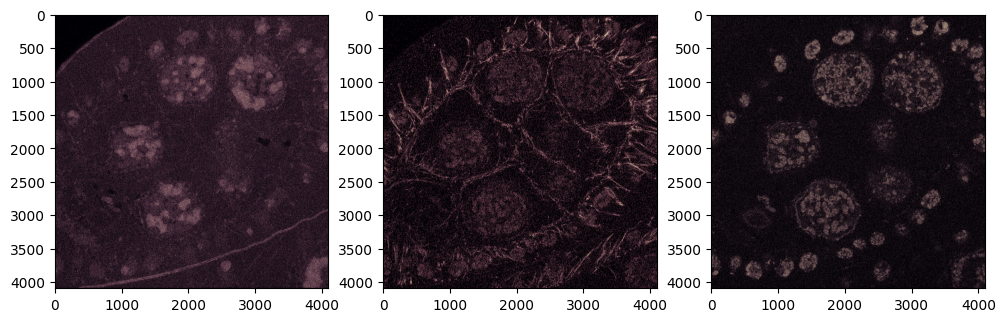

In [59]:
# index = 0
fig = plt.figure(figsize=(12, 8))
fig.add_subplot(1,3,1)
plt.imshow(
    images[0],
    cmap='magma',
    vmin=np.percentile(images[0], 1),
    vmax=np.percentile(images[0], 95),
)
fig.add_subplot(1,3,2)
plt.imshow(
    images[3],
    cmap='magma',
    vmin=np.percentile(images[3], 1),
    vmax=np.percentile(images[3], 95),
)
fig.add_subplot(1,3,3)
plt.imshow(
    images[6],
    cmap='magma',
    vmin=np.percentile(images[6], 1),
    vmax=np.percentile(images[6], 95),
)

___
with `aicspylibczi`


In [5]:
from aicspylibczi import CziFile

In [6]:
image_loader = CziFile(file_path)
image_loader.dims, image_loader.size

('HSTCZMYX', (2, 1, 1, 8, 607, 6, 4096, 4096))

In [7]:
image_loader.get_dims_shape()

[{'X': (0, 4096),
  'Y': (0, 4096),
  'Z': (0, 607),
  'C': (0, 8),
  'T': (0, 1),
  'M': (0, 6),
  'S': (0, 1),
  'H': (0, 2)}]

In [9]:
z = image_loader.size[getDimensionPosition(image_loader.dims, 'Z')] // 2
z

303

In [10]:
temp = image_loader.read_image(H=0, S=0, M=0, T=0, C=0, Z=z)
temp[1]

[('H', 1),
 ('S', 1),
 ('T', 1),
 ('C', 1),
 ('Z', 1),
 ('M', 1),
 ('Y', 4096),
 ('X', 4096)]

In [14]:
image_loader.size[getDimensionPosition(image_loader.dims, 'M')]

6

In [20]:
temp_image = []
for tile in range(image_loader.size[getDimensionPosition(image_loader.dims, 'M')]):    
    # for chan in range(0):
        # if (phase == 1 and chan == 1):
        #     continue
        #try:
    temp = image_loader.read_image(H=0, S=0, M=tile, T=0, C=0, Z=z)
    print(temp[0].shape, temp[1])
    temp_image.append(temp[0].squeeze())
        #except:
            #   continue

(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]
(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]
(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]
(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]
(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]
(1, 1, 1, 1, 1, 1, 4096, 4096) [('H', 1), ('S', 1), ('T', 1), ('C', 1), ('Z', 1), ('M', 1), ('Y', 4096), ('X', 4096)]


In [24]:
temp_image[0].shape

(4096, 4096)

In [ ]:
fig = plt.figure(figsize=(16,16))
fig.add_subplot(2, 2, 1)
# temp_image = image_data[1][0].squeeze()
x_start, x_end, y_start, y_end = 2000, 2500, 0, 500

plt.imshow(
    # temp_image,
    temp_image[0].squeeze()[y_start:y_end, x_start:x_end],
    cmap='magma',
    vmin=np.percentile(temp_image[0].squeeze()[y_start:y_end, x_start:x_end], 1),
    vmax=np.percentile(temp_image[0].squeeze()[y_start:y_end, x_start:x_end], 99),
    )

fig.add_subplot(2, 2, 2)
plt.imshow(
    temp_image[1].squeeze()[y_start:y_end, x_start:x_end],
    cmap='magma',
    vmin=np.percentile(temp_image[1].squeeze()[y_start:y_end, x_start:x_end], 1),
    vmax=np.percentile(temp_image[1].squeeze()[y_start:y_end, x_start:x_end], 99),
    )

fig.add_subplot(2, 2, 3)
plt.imshow(
    temp_image[2].squeeze()[y_start:y_end, x_start:x_end],
    cmap='magma',
    vmin=np.percentile(temp_image[2].squeeze()[y_start:y_end, x_start:x_end], 1),
    vmax=np.percentile(temp_image[2].squeeze()[y_start:y_end, x_start:x_end], 99),
    )

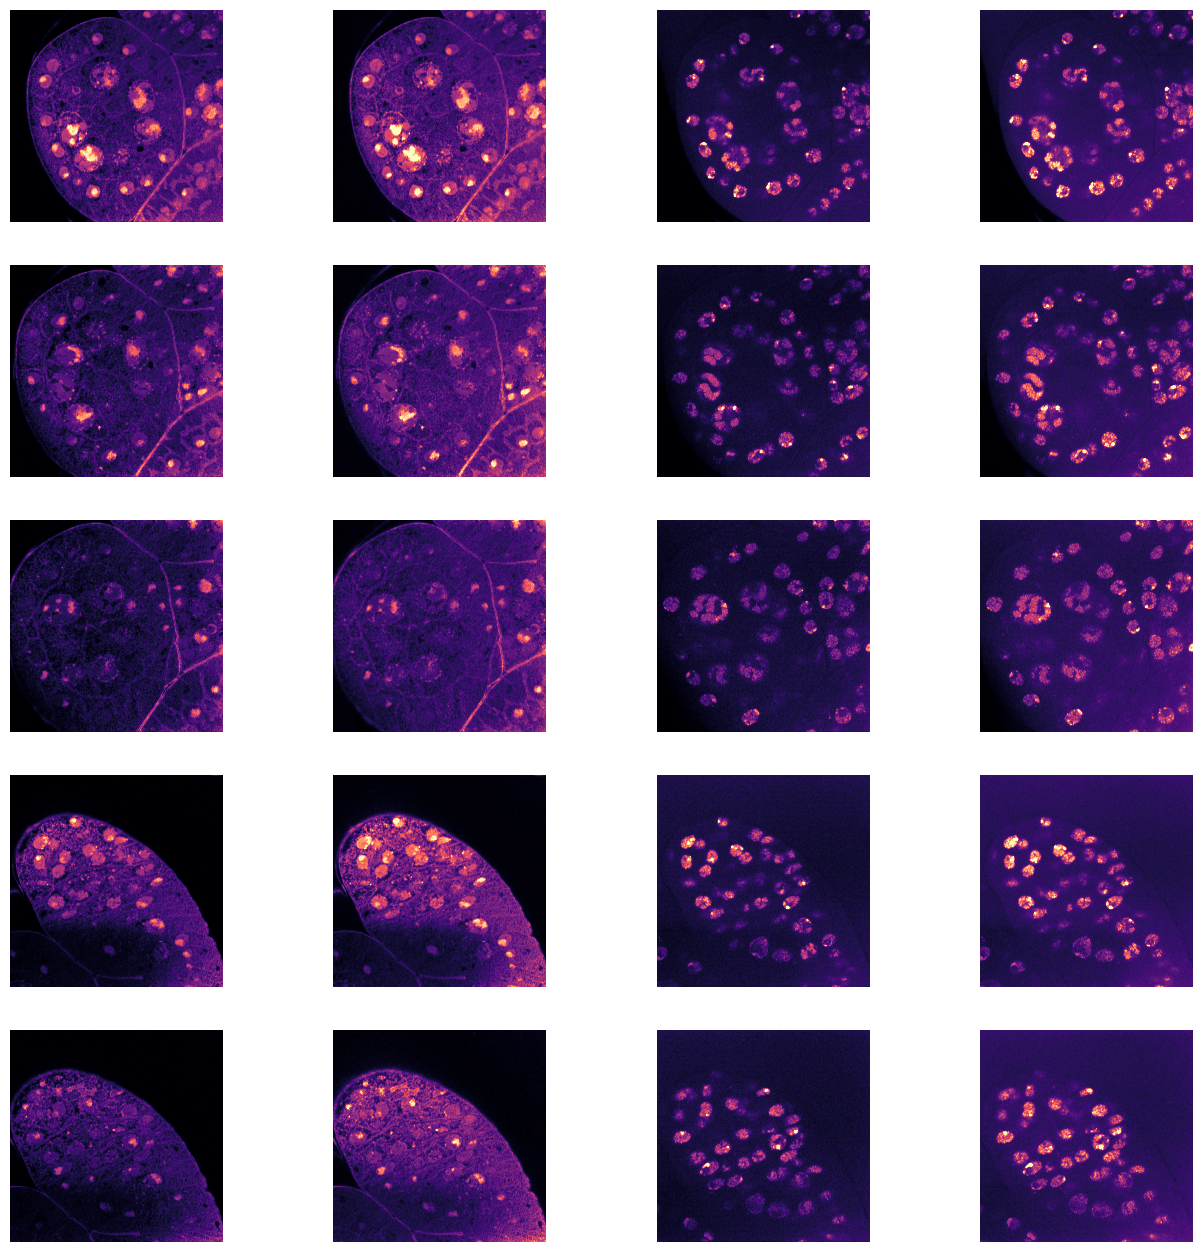

In [28]:
x, y = len(images_to_inspect[0]), len(images_to_inspect)
index = 0

fig = plt.figure(figsize=(16,16))
for i in range(y):
    for j in range(x):
        plt.subplot(y, x, i * x + j + 1)
        # img = temp_image[index]
        img = images_to_inspect[i][j]
        # if pmin!=0 or pmax!=100:
        #     img = normalize(img,pmin=pmin,pmax=pmax,clip=True)
        plt.imshow(
            img,
            vmin=np.percentile(img, 3),
            vmax=np.percentile(img, 99),
            cmap='magma',
            )
        plt.axis("off")
        index+=1

___ 
Read and write airyscan data

### save single channel for processing

In [ ]:
channel_index = 2
channel_range = 2 # the number ariyscan data channels per acquired channel
for channel in range(channel_index, channel_index + channel_range):
    print(channel)

In [15]:
channel_index = 4
channel_range = 2 # the number ariyscan data channels per acquired channel

with pyczi.open_czi(file_path) as czidoc_r:
    tbd = czidoc_r.total_bounding_box
    bd = czidoc_r.scenes_bounding_rectangle
    file_metadata = czidoc_r.metadata

    image_name = file_metadata['ImageDocument']['Metadata']['Experiment']['AutoSave']['Name']
    # channels_display = file_metadata['ImageDocument']['Metadata']['DisplaySetting']['Channels']['Channel'][:2]

    # channels_display = {}
    # for i in range(channel_range):
    #     channels_display[i] = file_metadata['ImageDocument']['Metadata']['DisplaySetting']['Channels']['Channel'][i+channel_index]

    pixelsize_x = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value'])
    pixelsize_y = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value'])
    pixelsize_z = float(file_metadata['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][2]['Value'])
    
    channel_names = {}
    for i in range(channel_range):
        channel_names[i] = file_metadata['ImageDocument']['Metadata']['DisplaySetting']['Channels']['Channel'][i+channel_index]['@Name']

    # print(channels_display)
    # print(channel_names)
    # stop

    save_file_path = str(save_path)+'/'+filename+'_ch'+str(channel_index+1)+'.czi'
    with pyczi.create_czi(save_file_path, exist_ok=True) as czidoc_w:
        for t in range(tbd['T'][-1]):
            for slice in tqdm(range(tbd['Z'][-1])):
                for channel in range(channel_index, channel_index + channel_range):
                    for phase in range(tbd['H'][-1]):
                        slice_temp = czidoc_r.read(plane={'T': t, 'Z': slice, 'C': channel, 'H': phase})
                        czidoc_w.write(
                            data=slice_temp,
                            plane={
                                'H': phase,
                                'T': t,
                                'Z': slice,
                                'C': (channel-channel_index), # this bit is needed to write as channel 0 or 1
                            },
                            compression_options = "zstd0:ExplicitLevel=2",
                        )
        
        czidoc_w.write_metadata(
            image_name,
            channel_names = channel_names,
            scale_x = pixelsize_x,
            scale_y = pixelsize_y,
            scale_z = pixelsize_z,
            # display_settings = channels_display
        )




  0%|          | 0/344 [00:00<?, ?it/s]

from Zeiss' website

In [ ]:
# data = inference_service.run() # [2, y, x] array with 2 being the number of classes.

# with czi.open_czi(path, 'w'):

#     class_nuclei = data[0,:,:]
#     channel_0 = { 'C': 0 }

#     czi.write(data=class_nuclei, location=(0,0), plane=channel_0, compression_options = "zstd0:ExplicitLevel=0" )

#     class_background = data[1,:,:]
#     channel_1 = { 'C': 1 }

#     czi.write(data=class_background, location=(0,0), plane=channel_1, compression_options = "zstd1:ExplicitLevel=2" )

#     # If we stopped here, we'd have a valid CZI. But we want to name the channels after the classes.

#     channel_names = { 0: "C1", 1: "C2" }
#     custom_attributes = {"key1": "value1", "key2": "value2"}

#     czi.write_metadata(channel_names=channel_names, scale_x=0.1 * 1e-6, scale_y=0.1 * 1e-6, custom_attributes=custom_attributes)

#     # If we want to specify specific colors for specific channels, we write as follows:
#     # In this case we are specifying c1 as blue and c2 as green.
    
#     display_setting_dict: Dict[int, ChannelDisplaySettingsDataClass] = {}
#     tint_color_c1 = Rgb8Color(np.uint8(0x00), np.uint8(0xFF), np.uint8(0x00))
#     channel_setting_c1 = ChannelDisplaySettingsDataClass(True, TintingMode.Color, tint_color_c1)
#     display_setting_dict[0] = channel_setting_c1
#     tint_color_c2 = Rgb8Color(np.uint8(0x00), np.uint8(0x00), np.uint8(0xFF))
#     channel_setting_c2 = ChannelDisplaySettingsDataClass(True, TintingMode.Color, tint_color_c2)
#     display_setting_dict[1] = channel_setting_c2

#     czi.write_metadata(display_settings=display_setting_dict)

#     # Similarly, if we want to specify specific colors and black/white levels for specific channels, we write as follows:
#     # In this case we are specifying c1 as blue and c2 as green.
#     # Additionally we specify c1 with black point as 0.2 and white point as 0.8 and c2 with black point as 0.3 and white point as 0.75.

#     display_setting_dict: Dict[int, ChannelDisplaySettingsDataClass] = {}
#     tint_color_c1 = Rgb8Color(np.uint8(0x00), np.uint8(0xFF), np.uint8(0x00))
#     channel_setting_c1 = ChannelDisplaySettingsDataClass(True, TintingMode.Color, tint_color_c1, 0.2, 0.8)
#     display_setting_dict[0] = channel_setting_c1
#     tint_color_c2 = Rgb8Color(np.uint8(0x00), np.uint8(0x00), np.uint8(0xFF))
#     channel_setting_c2 = ChannelDisplaySettingsDataClass(True, TintingMode.Color, tint_color_c2, 0.3, 0.75)
#     display_setting_dict[1] = channel_setting_c2

#     czi.write_metadata(display_settings=display_setting_dict)

#     # Note: writing display setting for a channel overwrites any existing display setting as we do not fetch the current display setting.
#     # Note: There is no 1:1 relationship enforced. A user may decide to add display settings to each channel or only to some channels.
#     #       Similarly, it is not verified if the user sends more display settings than channels present.
#     #       Display setting that are not written will be set as 'empty' regardless of if the initially existed for that channel.